In [180]:
import time, sys
# Settings

# bpm = [40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 63, 66, 69, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 126, 132, 138, 144, 152, 160, 168, 176, 184, 192, 200, 208]

# name between 40 and 60 = slow

named_bpm = {
    'largo': [40, 42, 44, 46, 48, 50, 52, 54, 56, 58],
    'larghetto': [60, 63],
    'adagio': [66, 69, 72],
    'andante': [76, 80, 84, 92, 96, 100, 104],
    'moderato': [108, 112, 116],
    'allegro': [120, 126, 132, 138, 144, 152, 160],
    'presto': [168, 176, 184, 192],
    'prestissimo': [200, 208]
}

# array of all possible bpm
bpm = []
for key in named_bpm:
    bpm += named_bpm[key]

# array of all possible
# print(bpm)

beats = [2, 3, 4]

def get_milliseconds(bpm):
    # 60 seconds in a minute
    # x bpm = x beats per minute
    # 60 / x = 1 beat per x seconds
    # count number of milliseconds between beats
    return 60 / bpm * 1000
    
def launch_metronome(bpm, beats=4):
    # get milliseconds between beats
    ms_btw_beats = get_milliseconds(bpm)  
    beats = beats - 1
    # start metronome
    while True:
        print('0', end="---"),
        time.sleep(ms_btw_beats / 1000)
        for i in range(beats):
            print('x', end="---")
            time.sleep(ms_btw_beats / 1000)      
        print('|')   

print(get_milliseconds(60))

launch_metronome(140)




1000.0
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---x---x---|
0---x---

KeyboardInterrupt: 

In [ ]:
!pip3 install svgwrite


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


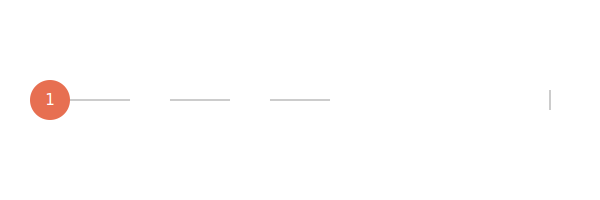

In [188]:
import svgwrite

def generate_svg(beats, bpm):

    ms = get_milliseconds(bpm)

    total_duration = ms * beats

    # Ajout des cercles
    circle_spacing = 100  # Espacement horizontal entre les cercles
    circle_radius = 20  # Rayon des cercles

    # Création du dessin SVG avec une taille de 500x200
    dwg = svgwrite.Drawing(filename='output.svg', size=(str((beats + 1) * circle_spacing) + 'px', '200px'))

    # Définition de la ligne principale
    line = dwg.line((50, 100), (350, 100), stroke='#ccc', stroke_width=2)
    dwg.add(line)

    for i in range(beats):
        animation_id = 'line1a' + str(i + 1)
        animation_from = 50 + i * circle_spacing
        antimation_to = 150 + i * circle_spacing
        animation_dur = str(ms) + 'ms'
        if i == 0:
            animation_begin = "0s;" + 'line1a' + str(beats) + '.end'
        else:
            animation_begin = 'line1a' + str(i) + '.end'
        animate = dwg.animate(
                            id=animation_id,
                            attributeName='x2',
                            fill="freeze", 
                            dur=animation_dur,
                            from_=animation_from,
                            to=antimation_to,
                            begin=animation_begin
                            )
        line.add(animate)

    for i in range(beats):
        if i == 0:
            circle_fill = "#e76f51"
        else:
            circle_fill = "white"

        cx = 50 + i * circle_spacing
        circle = dwg.circle(center=(cx, 100),
                            r=circle_radius,
                            fill=circle_fill
                            )
        dwg.add(circle)
        
        text = dwg.text(str(i + 1), insert=(cx - 5, 105), font_size="16px", font_family="monospace", fill="#fff")
        dwg.add(text)

        if i != 0:
            # <animate id="c2f1" attributeName="fill" begin="line1a1.end" from="#fff" to="#2a9d8f" dur="1ms" />
            animate1 = dwg.animate(
                                id='c' + str(i + 1) + 'f1',
                                attributeName='fill',
                                dur="1ms",
                                to="#2a9d8f",
                                from_="#fff",
                                begin='line1a' + str(i) + '.end'
                                )
            circle.add(animate1)
            # <animate id="c2f2" attributeName="fill" begin="c2f1.end" from="#2a9d8f" to="#2a9d8f" dur="1499ms" />
            animate2 = dwg.animate(
                                id='c' + str(i + 1) + 'f2',
                                attributeName='fill',
                                dur=str((total_duration - (ms * i)) - 1) + 'ms',
                                to="#2a9d8f",
                                from_="#2a9d8f",
                                begin='c' + str(i + 1) + 'f1.end'
                                )
            circle.add(animate2)

    #  <line id="end_line" x1="450" y1="90" x2="450" y2="110" stroke="#ccc" stroke-width="2"></line>
    end_line_x = 50 + beats * circle_spacing
    end_line = dwg.line((end_line_x, 90), (end_line_x, 110), stroke='#ccc', stroke_width=2)
    dwg.add(end_line)

    # Enregistrer le dessin SVG dans un fichier
    dwg.save()
    return dwg

generate_svg(5, 208)

# pretty print svg
# !xmllint --format output.svg --output output.svg

# show svg
from IPython.display import SVG, display
display(SVG('output.svg'))
